In [19]:
import pandas as pd
import numpy as np
import joblib

In [2]:
df=pd.read_csv('data/india_housing_prices.csv')

In [21]:
df.shape

(250000, 23)

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Original DataFrame shape:", df.shape)
print("Encoded DataFrame shape:", df_encoded.shape)
print("First 5 rows of the encoded DataFrame:")
print(df_encoded.head())

Original DataFrame shape: (250000, 23)
Encoded DataFrame shape: (250000, 908)
First 5 rows of the encoded DataFrame:
   ID  BHK  Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  \
0   1    1          4740          489.76            0.10        1990   
1   2    3          2364          195.52            0.08        2008   
2   3    2          3642          183.79            0.05        1997   
3   4    2          2741          300.29            0.11        1991   
4   5    4          4823          182.90            0.04        2002   

   Floor_No  Total_Floors  Age_of_Property  Nearby_Schools  ...  \
0        22             1               35              10  ...   
1        21            20               17               8  ...   
2        19            27               28               9  ...   
3        21            26               34               5  ...   
4         3             2               23               4  ...   

   Amenities_Pool, Playground, Gym, Clubhouse  

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Price_in_Lakhs', 'ID'], axis=1)
y = df_encoded['Price_in_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (200000, 906)
Shape of X_test: (50000, 906)
Shape of y_train: (200000,)
Shape of y_test: (50000,)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


Matplotlib is building the font cache; this may take a moment.


Mean Absolute Error (MAE): 81.26
Mean Squared Error (MSE): 10204.10
R-squared (R2): 0.49


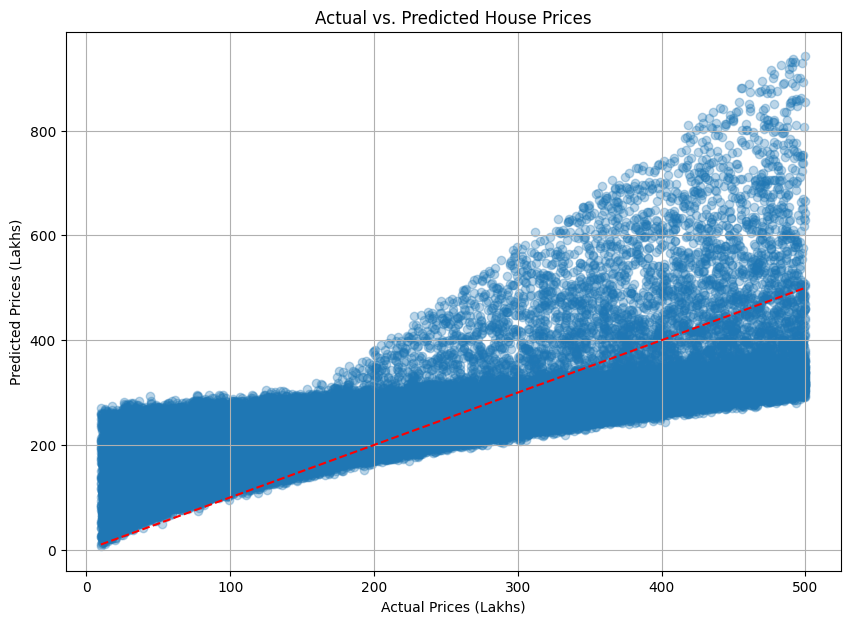

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices (Lakhs)')
plt.ylabel('Predicted Prices (Lakhs)')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

In [12]:
import numpy as np

numerical_cols = df_encoded.select_dtypes(include=np.number).columns.drop('ID')

print("Applying outlier capping to numerical columns:")
for col in numerical_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_encoded[col] = np.where(df_encoded[col] > upper_bound, upper_bound, df_encoded[col])
    df_encoded[col] = np.where(df_encoded[col] < lower_bound, lower_bound, df_encoded[col])
    print(f"  - {col} capped: Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}")

print("Outlier capping completed for numerical features in df_encoded.")

Applying outlier capping to numerical columns:
  - BHK capped: Lower Bound=-1.00, Upper Bound=7.00
  - Size_in_SqFt capped: Lower Bound=-1753.50, Upper Bound=7250.50
  - Price_in_Lakhs capped: Lower Bound=-233.94, Upper Bound=743.38
  - Price_per_SqFt capped: Lower Bound=-0.12, Upper Bound=0.33
  - Year_Built capped: Lower Bound=1972.50, Upper Bound=2040.50
  - Floor_No capped: Lower Bound=-17.00, Upper Bound=47.00
  - Total_Floors capped: Lower Bound=-14.50, Upper Bound=45.50
  - Age_of_Property capped: Lower Bound=-15.50, Upper Bound=52.50
  - Nearby_Schools capped: Lower Bound=-4.50, Upper Bound=15.50
  - Nearby_Hospitals capped: Lower Bound=-4.50, Upper Bound=15.50
Outlier capping completed for numerical features in df_encoded.


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Price_in_Lakhs', 'ID'], axis=1)
y = df_encoded['Price_in_Lakhs']

original_X_shape = X.shape

X['BHK_Size_Interaction'] = X['BHK'] * X['Size_in_SqFt']

X['Size_in_SqFt_Squared'] = X['Size_in_SqFt']**2

print("Shape of X after feature engineering:", X.shape)

k_features = 200
selector = SelectKBest(score_func=f_regression, k=k_features)

selector.fit(X, y)

X_selected = selector.transform(X)

selected_feature_names = X.columns[selector.get_support(indices=True)]

X = pd.DataFrame(X_selected, columns=selected_feature_names, index=X.index)

print("Number of features in X before selection:", original_X_shape[1])
print("Number of features in X after selection:", X.shape[1])
print(f"Selected {X.shape[1]} features using SelectKBest.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes after splitting:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X after feature engineering: (250000, 908)
Number of features in X before selection: 906
Number of features in X after selection: 200
Selected 200 features using SelectKBest.

Shapes after splitting:
Shape of X_train: (200000, 200)
Shape of X_test: (50000, 200)
Shape of y_train: (200000,)
Shape of y_test: (50000,)


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 11.33
Mean Squared Error (MSE): 471.63
R-squared (R2): 0.98


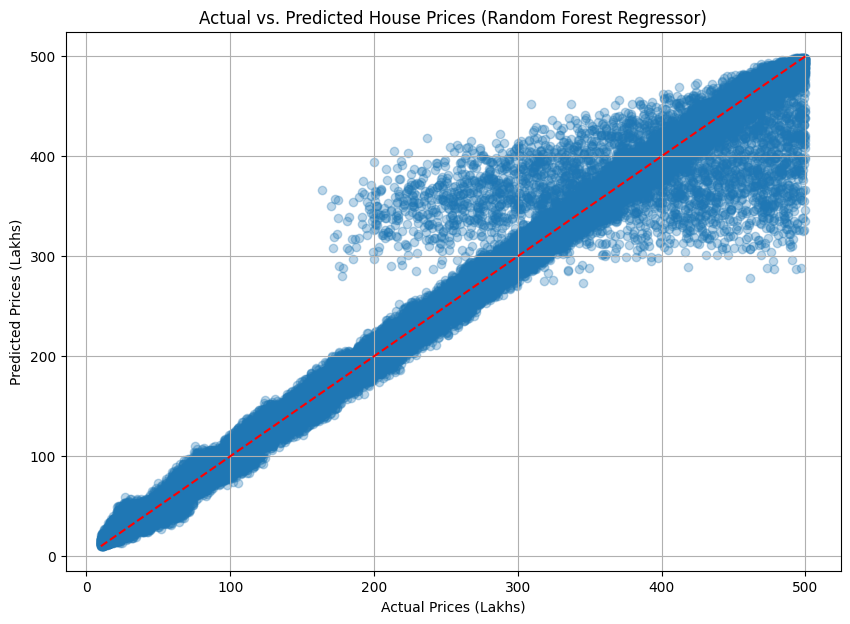

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices (Lakhs)')
plt.ylabel('Predicted Prices (Lakhs)')
plt.title('Actual vs. Predicted House Prices (Random Forest Regressor)')
plt.grid(True)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 11.33
Mean Squared Error (MSE): 471.63
R-squared (R2): 0.98


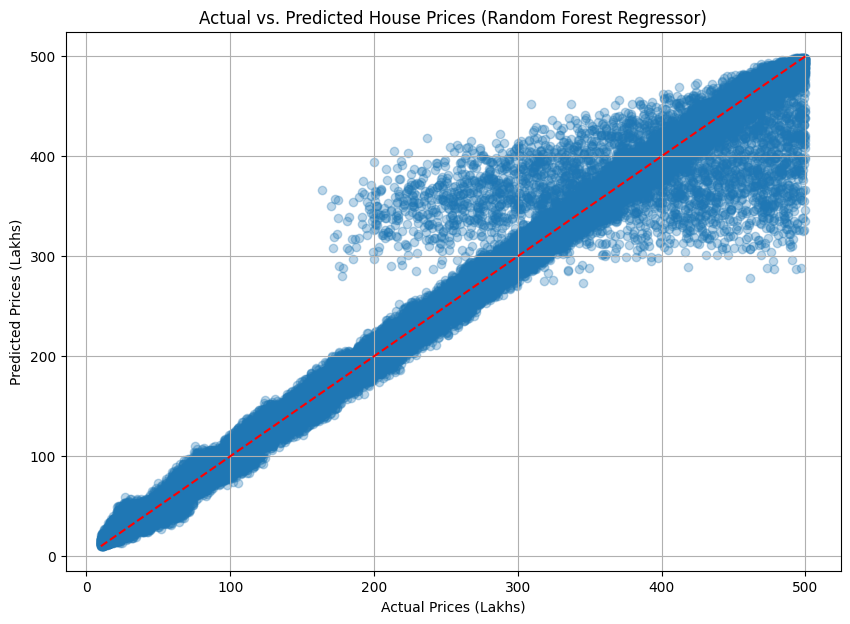

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices (Lakhs)')
plt.ylabel('Predicted Prices (Lakhs)')
plt.title('Actual vs. Predicted House Prices (Random Forest Regressor)')
plt.grid(True)
plt.show()

In [ ]:
model_filename = 'random_forest_regressor_model.joblib'

joblib.dump(rf_model, model_filename)

print(f"Best model (Random Forest Regressor) saved successfully as '{model_filename}'")

Best model (Random Forest Regressor) saved successfully as 'random_forest_regressor_model.joblib'
